# Convergence of Sample Average

Before we go to the theory portion of the Law of Large Numbers, let's see how the sample average converges to the population mean in practice. We will use the `numpy` package to generate random numbers from a normal distribution. We will then compute the sample average and plot it against the population mean.

## Bernoulli Example

To help you visualize the randomness of $\bar{X}$, we consider an experiment of drawing $N$ Bernoulli random variables, $X_1, x_2, \ldots, X_N$ with parameter $p=0.5$.

By definition of Bernoulli Trial, they are all independent. So $x_1, x_2, \ldots, x_N$ are i.i.d..

Since $X_n \sim \operatorname{Ber}(0.5)$, then

$$
\mathbb{E}\left[X_n\right]=p=0.5 \quad \operatorname{Var}\left[x_n\right]=p(1-p)=0.25
$$

Furthermore, the sample average is given by

$$
\bar{X}=\frac{1}{N} \sum_{n=1}^N X_n
$$ (eq:sample-average-1)

$\bar{X}$ is completely determined since $X_n$ is known to be a Bernoulli of $p=0.5$.

1. $\bar{X}$ is a Binomial rv since it is the sum of $N$ Bernoulli random variables.
2. $\bar{X}$ has mean and variance:
   
    $$
    \mu_{\bar{X}}=E\left[\bar{X}_N\right]=\frac{1}{N} \sum_{n=1}^N \underbrace{E\left[X_n\right]}_p=\frac{1}{N} \cdot(N p)=p
    $$

    $$
    \sigma_{\bar{X}}^2=\operatorname{Var}\left[\bar{X}_N\right]=\frac{1}{N^2} \sum_{n=1}^N \underbrace{\operatorname{Var}\left[X_n\right]}_{p(1-p)}=\frac{N p(1-\rho)}{N^2}=\frac{p(1-p)}{N^2}
    $$
    
So now let $N$ be arbitrary, then we can say $Y=X_1+X_2+\ldots+X_N \sim \operatorname{Binomial}(N, p)$. And to find the sample average of $X_1, X_2, \ldots X_N$ is simply:

$$
\bar{X}=\frac{1}{N} \cdot Y
$$ (eq:sample-average-2)

{eq}`eq:sample-average-1` and {eq}`eq:sample-average-2` are equivalent. The reason is that the sum of $N$ Bernoulli random variables is a Binomial random variable. So we can also
just use the Binomial distribution to find the sample average. 

Now, one very important aspect is that $\bar{X}$ is a random variable. Therefore, we can index them just like how we indexed $X_n$. So in order to compute the ***empirical mean***
of $\bar{X}$ for $M$ samples $\bar{X}_1, \bar{X}_2, \ldots, \bar{X}_M$, we can simply compute the sample average of the sample averages:

$$
\text{Mean}(\bar{X}_1, \bar{X}_2, \ldots, \bar{X}_M)=\frac{1}{M} \sum_{m=1}^M \bar{X}_m
$$

## Visualizing the Convergence

In [124]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import random
import numpy.matlib

import sys
from pathlib import Path
parent_dir = str(Path().resolve().parents[3])
print(parent_dir)
sys.path.append(parent_dir)

from omnivault.utils.probability_theory.plot import plot_hist
from omnivault.utils.reproducibility.seed import seed_all

/Users/gaohn/gao/gaohn-probability-stats


In [125]:
seed = 42
seed_all(seed)

Using Seed Number 42


`sample_average` in itself is a rv, and therefore you can repeat it many times
as well, just like the `size` parameter for rvs.
we are looping over trials to get the empirical mean!

So the $M$ samples denoting the index of the sample average $\bar{X}_m$ is named `trials` here.

In [126]:
def compute_sample_average_of_bernoulli(
    num_trials: int, p: float, size: int
) -> np.ndarray:
    # list of sample averages containing each trial
    sample_averages = np.zeros(shape=num_trials)

    for trial in range(num_trials):
        rv_bernoulli = stats.bernoulli.rvs(p, size=size)
        sample_average = np.sum(rv_bernoulli) / size  # np.mean
        sample_averages[trial] = sample_average
    return sample_averages

In [127]:
p = 0.5
trials = 500
N = 100
sample_averages = compute_sample_average_of_bernoulli(num_trials=trials, p=p, size=N)

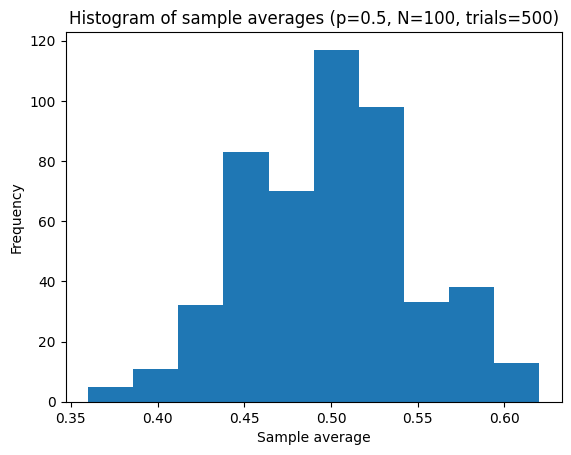

In [128]:
fig, ax = plt.subplots()

plot_hist(ax, sample_averages, bins=10)
plt.xlabel("Sample average")
plt.ylabel("Frequency")
plt.title(f"Histogram of sample averages (p={p}, N={N}, trials={trials})")
plt.show()

Let's try to visualize with `N = 100, 500, 1000, 5000`.

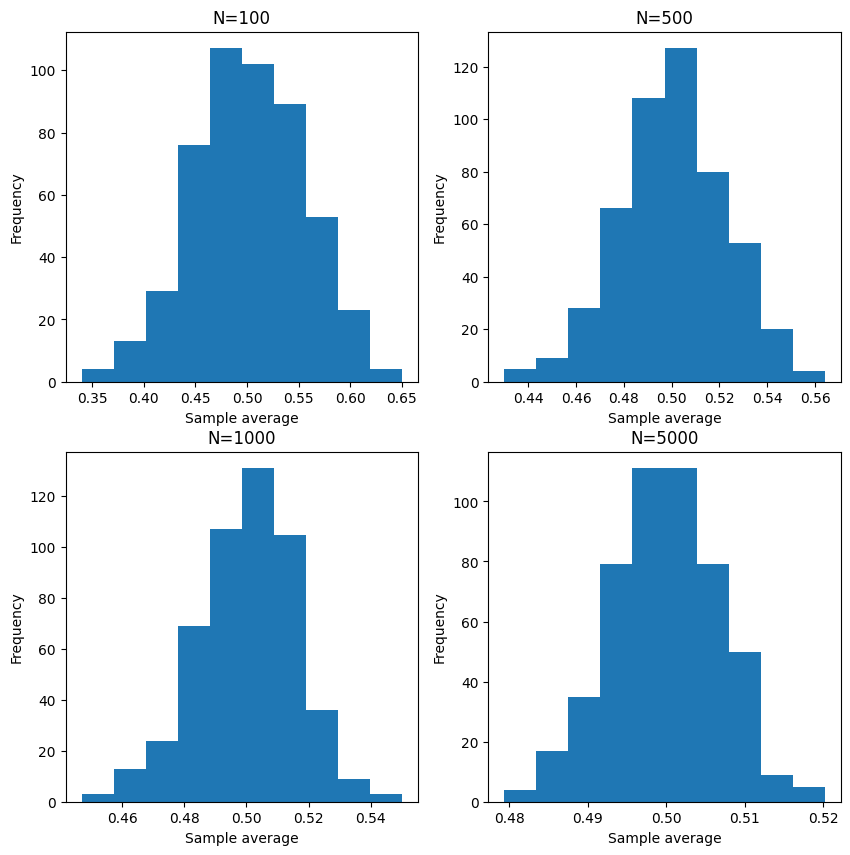

In [129]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

N_list = [100, 500, 1000, 5000]

for i, N in enumerate(N_list):
    sample_averages = compute_sample_average_of_bernoulli(num_trials=trials, p=p, size=N)
    ax = axes[i // 2, i % 2]
    plot_hist(ax, sample_averages, bins=10)
    ax.set_xlabel("Sample average")
    ax.set_ylabel("Frequency")
    ax.set_title(f"N={N}")
plt.show()

Indeed, as $N$ increases, the sample average converges to the population mean. In other words, it is more gathered around the population mean of $0.5$.

Note the function `compute_sample_average_of_bernoulli`  is equivalent to the below
code with Binomial distribution. 

However, due to seeding and how
the random number generator works, the results are slightly different
even with the same seeds.

In [130]:
seed_all(seed)

rv_binomial = stats.binom.rvs(N, p, size=trials)

Using Seed Number 42


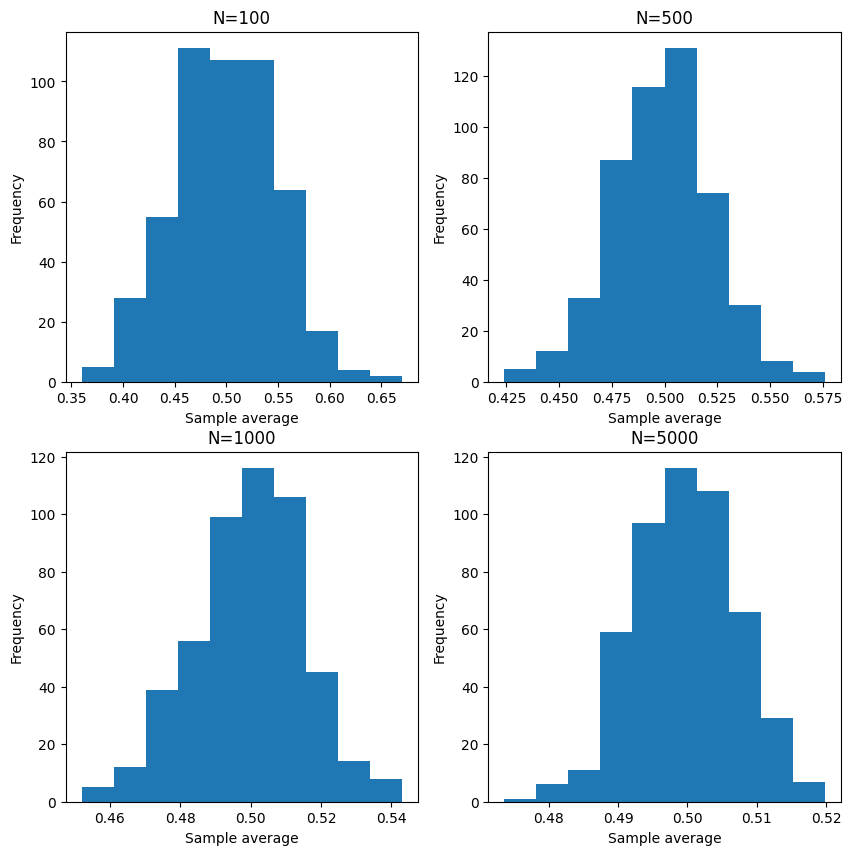

In [131]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

N_list = [100, 500, 1000, 5000]

for i, N in enumerate(N_list):
    sample_averages = stats.binom.rvs(N, p, size=trials) / N
    ax = axes[i // 2, i % 2]
    plot_hist(ax, sample_averages, bins=10)
    ax.set_xlabel("Sample average")
    ax.set_ylabel("Frequency")
    ax.set_title(f"N={N}")
plt.show()

The below code is adapted from {cite}`chan_2021`. 

1. Define the probability `p` for a Bernoulli distribution.
2. Define `trials` to be the number of trials to run. Note carefully this is different from `N` which is the number of Bernoulli random variables. This is actually the "number of times to repeat the experiment of drawing `N` Bernoulli random variables". In other words, this is the number of times to compute the sample average. You can also view it as the number of samples drawn from a Binomial distribution.
3. Define the number of steps to take between the smallest and largest sample sizes, and create an array of size steps containing numbers from $10^2$ to $10^5$. `N_ranges` holds 100 integers ranging from $10^2$ to $10^5$, spaced evenly on a log scale.
4. Create an empty 2D array `x` of shape `(trials, N_ranges.size)`, where each row corresponds to a different trial and each column corresponds to a different sample size.
5. Loop through the different sample sizes and generate trials number of Bernoulli random variables for each sample size `N`. Store the sample averages in column `i` of the `x` array.
6. Create a 2D array `N_ranges_grid` containing the same sample sizes `N` repeated trials times.
7. Plot the sample averages `x` against the sample sizes `N_ranges_grid` using a `semilogx` plot with black circles for each data point.
8. Plot a horizontal red line at `p + 3 * sqrt((p*(1-p))/N)` and `p - 3 * sqrt((p*(1-p))/N)`, representing the upper and lower bounds of the confidence interval for the sample mean at each sample size `N`.
9. Show the plot.

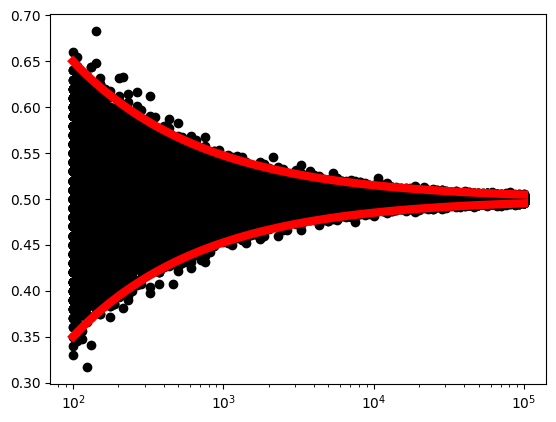

In [132]:
p = 0.5
trials = 1000

steps = 100
# array of size 100 containing numbers from 10^2 to 10^5
# start from 2 means 10^2, end at 5 means 10^5
N_ranges = np.round(np.logspace(2, 5, steps)).astype(int)

x = np.zeros((trials, N_ranges.size))  # (1000, 100)

for i in range(N_ranges.size):
    N = N_ranges[i]  # loop through, e.g. 1st element is N = 100;
    # sample_averages = compute_sample_average_of_bernoulli(
    #     num_trials=trials, p=p, size=N
    # )
    # x[:, i] = sample_averages
    x[:, i] = stats.binom.rvs(N, p, size=trials) / N

N_ranges_grid = np.matlib.repmat(N_ranges, trials, 1)
plt.semilogx(N_ranges_grid, x, "ko")
plt.semilogx(N_ranges, p + 3 * np.sqrt((p * (1 - p)) / N_ranges), "r", linewidth=6)
plt.semilogx(N_ranges, p - 3 * np.sqrt((p * (1 - p)) / N_ranges), "r", linewidth=6)
plt.show()

We can really visually see that as $N$ increases, the sample average converges to the population mean.

In author's words:

We plot the random variables $\bar{X}$ (the black crosses) for every $N$. You can see that at each $N$, e.g., $N=100$, there are many possible observations for $\bar{X}$ because $\bar{X}$ itself is a random variable. As $N$ increases, we see that the deviation of the random variables becomes smaller. In the same plot, we show the bounds $\mu \pm 3 \sigma_{\bar{X}}$, which are three standard deviations from the mean. We can see clearly that the bounds provide a very good envelope covering the random variables. As $N$ goes to infinity, we can see that the standard deviation goes to zero, and so $\bar{X}$ approaches the true mean.

It is worth noting that if the random variables are i.i.d., then this phenomenon is true for any distribution.

We can replicate the same for Gaussian with `mu=0` and `sigma=1`.

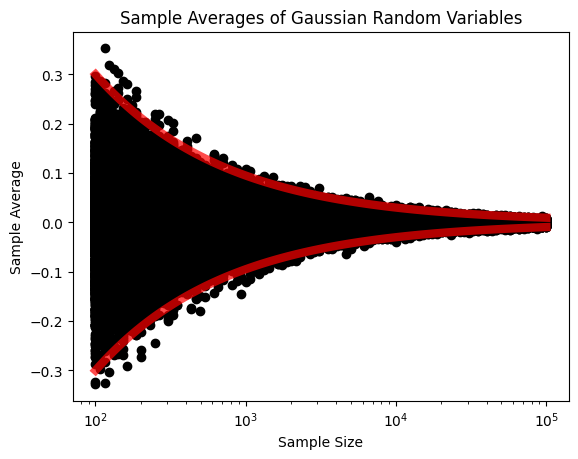

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import numpy.matlib

mu = 0
sigma = 1
trials = 1000
steps = 100
N_ranges = np.round(np.logspace(2, 5, steps)).astype(int)

x = np.zeros((trials, N_ranges.size))

for i in range(N_ranges.size):
    N = N_ranges[i]
    x[:, i] = stats.norm.rvs(mu, sigma, size=trials) / np.sqrt(N)

N_ranges_grid = np.matlib.repmat(N_ranges, trials, 1)

plt.semilogx(N_ranges_grid, x, "ko")
plt.semilogx(
    N_ranges, mu + 3 * sigma / np.sqrt(N_ranges), "r", linewidth=6, alpha=0.7
)
plt.semilogx(
    N_ranges, mu - 3 * sigma / np.sqrt(N_ranges), "r", linewidth=6, alpha=0.7
)
plt.xlabel("Sample Size")
plt.ylabel("Sample Average")
plt.title("Sample Averages of Gaussian Random Variables")
plt.show()


## Potential Confusion

There might be confusion initially because of `N` and `trials` potentially mean the same thing. However, they are very different.

`N` refers to the number of random variables $X_1, X_2, \ldots, X_N$ that's used to form
the new random variable $\bar{X} = \frac{1}{N} \sum_{n=1}^N X_n$. Then `trials` refers
to how many samples we want to generate from the distribution underlying $\bar{X}$.

I think the main confusion can resolved if you indicate that for each $\bar{X}$, we can generate $\bar{X}_{1}, \bar{X}_{2}, \ldots, \bar{X}_{M}$, where $M$ is the number of trials.
